# Car Price Prediction #   

In [2]:
 ## This dataset contains information about used cars listed on www.cardekho.com. 
    
 ## i am  going to finding predictions of used cars price with the use of regression models.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_csv('E:\Training\car data.csv')

In [5]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Fuel_Type'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
[0 1 3]


In [9]:
df.info()  #### The datatyps of the colmns are perfect and need no conversion..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
##check missing values##
df.isnull().sum()  ######## no missing values in the dataset ####

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [13]:
final_dataset['Current Year']=2020


In [14]:
final_dataset.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [15]:
final_dataset['car_age']=final_dataset['Current Year']- final_dataset['Year']


In [16]:
final_dataset.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [17]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [19]:
final_dataset.drop(['Current Year'],axis=1,inplace=True)

In [20]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [21]:
final_dataset.tail()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
296,9.50,11.6,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.9,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.0,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.5,9000,Diesel,Dealer,Manual,0,3
300,5.30,5.9,5464,Petrol,Dealer,Manual,0,4


#### data visualisation #####

In [22]:
final_dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'car_age'],
      dtype='object')

#### 1) Seller_Type

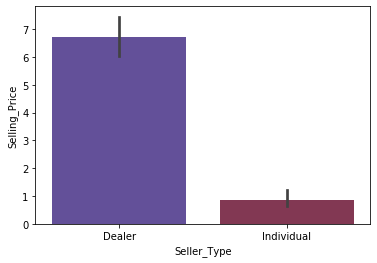

In [23]:
sns.barplot('Seller_Type','Selling_Price',data=final_dataset,palette='twilight')

In [24]:
#### Selling Price of cars seems to have higher prices when sold by Dealers when compared to Individuals###

### 2) Transmission 

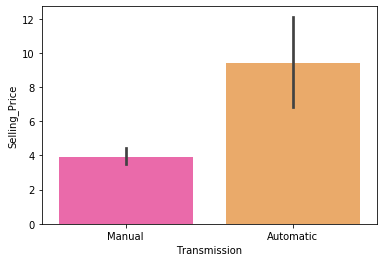

In [25]:
sns.barplot('Transmission','Selling_Price',data=final_dataset,palette='spring')

In [26]:
#####It can be observed that Selling Price would be higher for cars that are Automatic.

### 3) Fuel Type

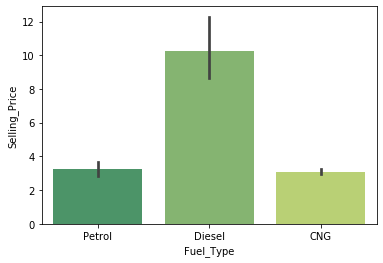

In [27]:
sns.barplot('Fuel_Type','Selling_Price',data=final_dataset,palette='summer')


In [28]:
##### Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG.

### 4) Present Price

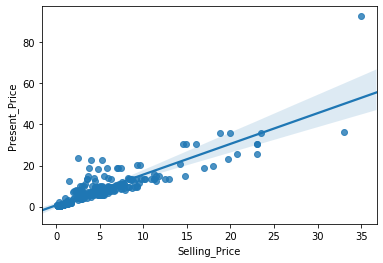

In [29]:
sns.regplot('Selling_Price','Present_Price',data=final_dataset)


In [30]:
#### Selling Price tends to increase with increase in the Present Price of cars.


### 5) Kms Driven

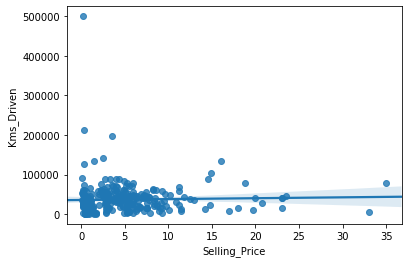

In [31]:
sns.regplot('Selling_Price','Kms_Driven',data=final_dataset)


In [32]:
#### Lesser the Kms driven higher the Selling Price.

### 6) Owner

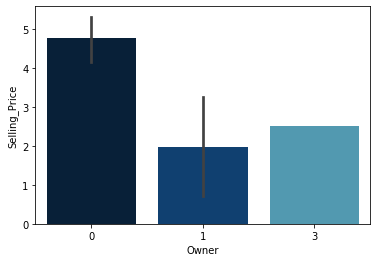

In [33]:
sns.barplot('Owner','Selling_Price',data=final_dataset,palette='ocean')

In [34]:
#### Selling Price is high with less Owners used Cars

### 7) Car Age ###

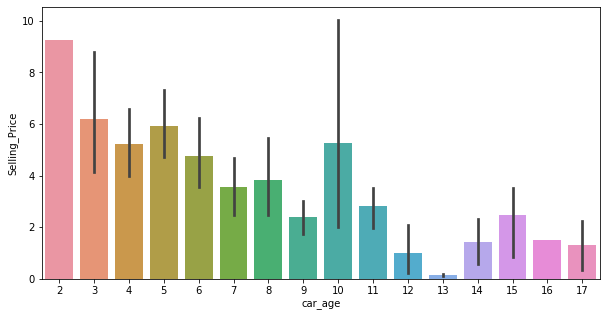

In [35]:
plt.figure(figsize=(10,5))
sns.barplot('car_age','Selling_Price',data=final_dataset)


In [36]:
#### Selling Price of cars 2 years old would be high and gradually decreases with car of 17 years old

#### Dealing With Categorical Variables ###

In [37]:
fuel = pd.get_dummies(final_dataset['Fuel_Type'])
transmission = pd.get_dummies(final_dataset['Transmission'],drop_first=True)
seller= pd.get_dummies(final_dataset['Seller_Type'],drop_first=True)


In [38]:
final_dataset= pd.concat([final_dataset,fuel,transmission,seller],axis=1)

In [39]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,CNG,Diesel,Petrol,Manual,Individual
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,0,0,1,1,0
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,0,1,0,1,0
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,0,0,1,1,0
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,0,0,1,1,0
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,0,1,0,1,0


In [40]:
final_dataset.drop('CNG',axis=1,inplace=True)

In [41]:
final_dataset.head()


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age,Diesel,Petrol,Manual,Individual
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,0,1,1,0
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,1,0,1,0
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,0,1,1,0
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,0,1,1,0
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,1,0,1,0


In [42]:
final_dataset.drop(['Fuel_Type','Seller_Type','Transmission'],axis=1,inplace=True)


In [43]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Diesel,Petrol,Manual,Individual
0,3.35,5.59,27000,0,6,0,1,1,0
1,4.75,9.54,43000,0,7,1,0,1,0
2,7.25,9.85,6900,0,3,0,1,1,0
3,2.85,4.15,5200,0,9,0,1,1,0
4,4.60,6.87,42450,0,6,1,0,1,0


In [44]:
import seaborn as sns

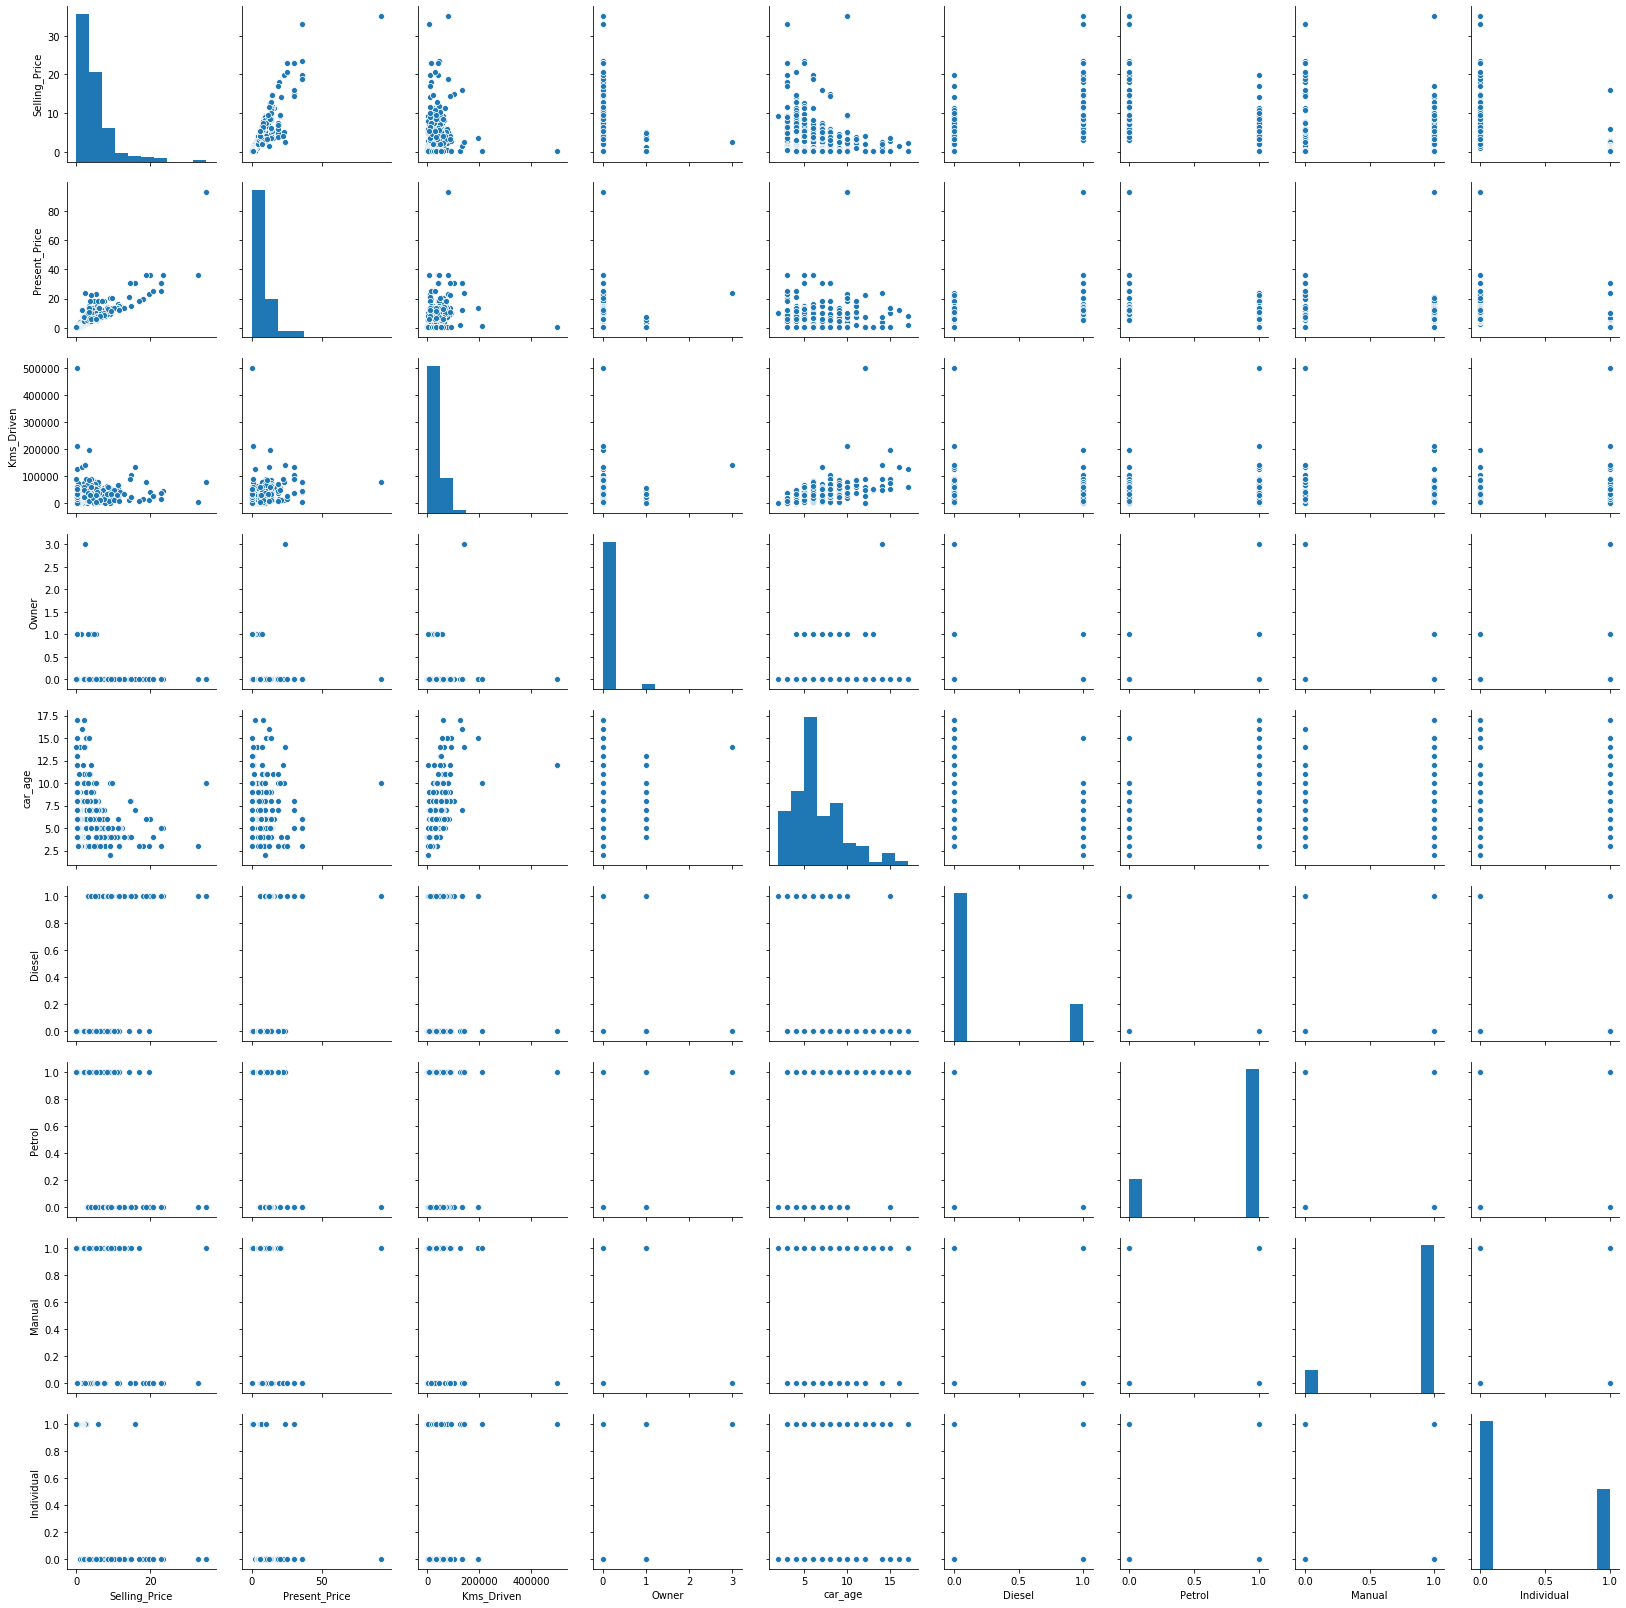

In [45]:
sns.pairplot(final_dataset)

In [46]:
import scipy.stats as stat
import pylab

In [47]:
###normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

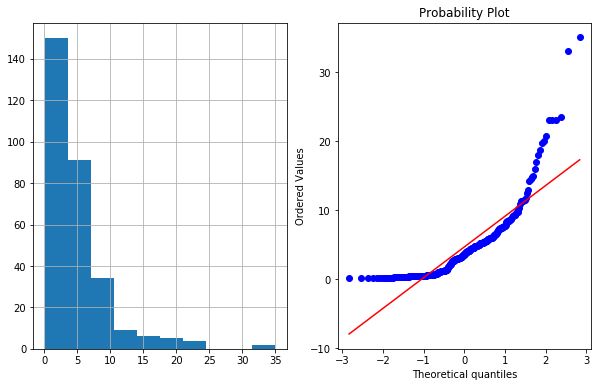

In [48]:
plot_data(final_dataset,'Selling_Price')

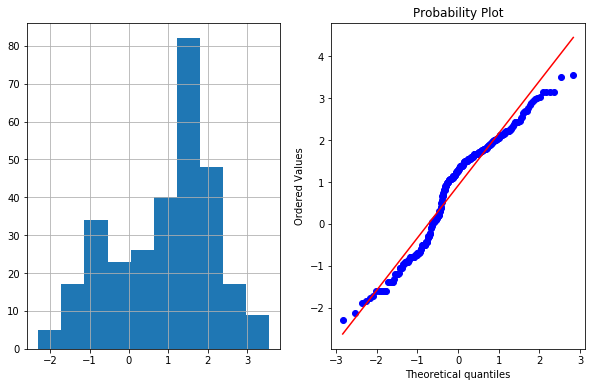

In [49]:
#### ### Logarithmic Transformation ##### Selling_Price
import numpy as np
final_dataset['Selling_Price_log']=np.log(final_dataset['Selling_Price'])
plot_data(final_dataset,'Selling_Price_log')

In [50]:
###normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

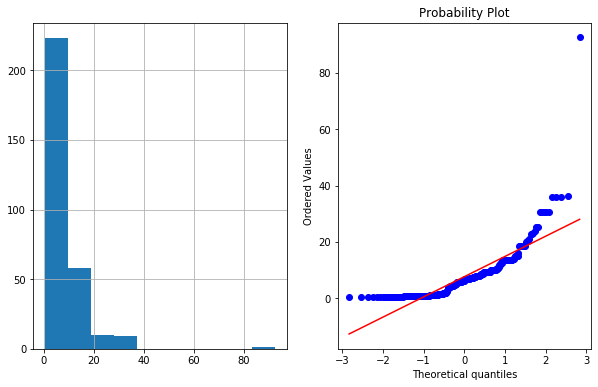

In [51]:
plot_data(final_dataset,'Present_Price')

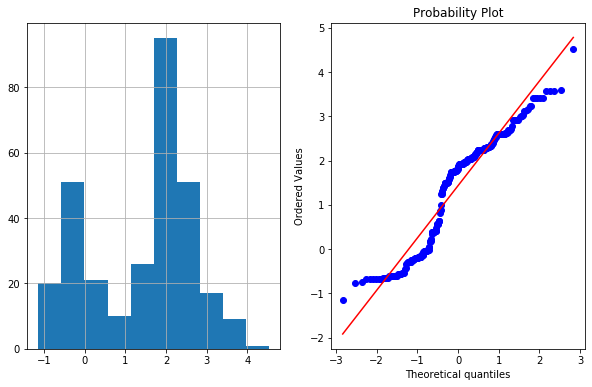

In [52]:
### Logarithmic Transformation ##### Present_Pric
final_dataset['Present_Price_log']=np.log(final_dataset['Present_Price'])
plot_data(final_dataset,'Present_Price_log')

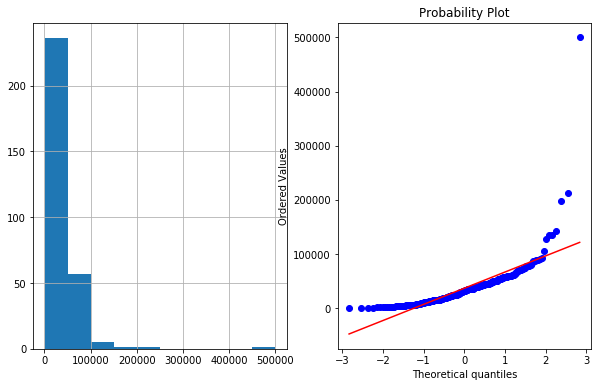

In [53]:
plot_data(final_dataset,'Kms_Driven')

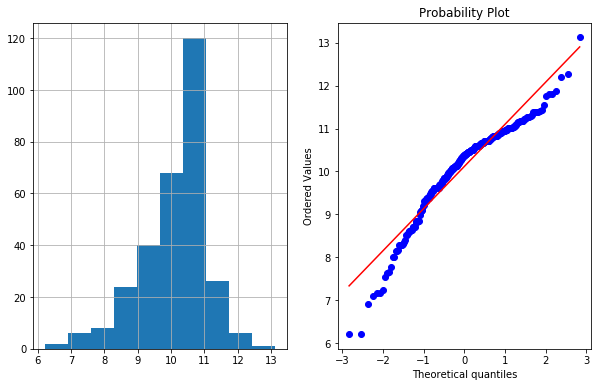

In [54]:
### Logarithmic Transformation ##### kms_Driven

final_dataset['Kms_Driven_log']=np.log(final_dataset['Kms_Driven'])
plot_data(final_dataset,'Kms_Driven_log')

In [55]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Diesel,Petrol,Manual,Individual,Selling_Price_log,Present_Price_log,Kms_Driven_log
0,3.35,5.59,27000,0,6,0,1,1,0,1.208960,1.720979,10.203592
1,4.75,9.54,43000,0,7,1,0,1,0,1.558145,2.255493,10.668955
2,7.25,9.85,6900,0,3,0,1,1,0,1.981001,2.287471,8.839277
3,2.85,4.15,5200,0,9,0,1,1,0,1.047319,1.423108,8.556414
4,4.60,6.87,42450,0,6,1,0,1,0,1.526056,1.927164,10.656082


In [56]:
final_dataset.drop(['Selling_Price','Present_Price','Kms_Driven'],axis=1,inplace=True)

In [57]:
final_dataset

,Owner,car_age,Diesel,Petrol,Manual,Individual,Selling_Price_log,Present_Price_log,Kms_Driven_log
0,0,6,0,1,1,0,1.208960,1.720979,10.203592
1,0,7,1,0,1,0,1.558145,2.255493,10.668955
2,0,3,0,1,1,0,1.981001,2.287471,8.839277
3,0,9,0,1,1,0,1.047319,1.423108,8.556414
4,0,6,1,0,1,0,1.526056,1.927164,10.656082
...,...,...,...,...,...,...,...,...,...
296,0,4,1,0,1,0,2.251292,2.451005,10.433763
297,0,5,0,1,1,0,1.386294,1.774952,11.002100
298,0,11,0,1,1,0,1.208960,2.397895,11.384342
299,0,3,1,0,1,0,2.442347,2.525729,9.104980


In [58]:
final_dataset.corr()


,Owner,car_age,Diesel,Petrol,Manual,Individual,Selling_Price_log,Present_Price_log,Kms_Driven_log
Owner,1.000000,0.182104,-0.053469,0.055687,-0.050316,0.124269,-0.117410,-0.027322,0.074260
car_age,0.182104,1.000000,-0.064315,0.059959,-0.000394,0.039896,-0.272282,0.000359,0.545249
Diesel,-0.053469,-0.064315,1.000000,-0.979648,-0.098643,-0.350467,0.480512,0.458826,0.260199
Petrol,0.055687,0.059959,-0.979648,1.000000,0.091013,0.358321,-0.477505,-0.458691,-0.265640
Manual,-0.050316,-0.000394,-0.098643,0.091013,1.000000,0.063240,-0.175041,-0.193357,-0.019486
Individual,0.124269,0.039896,-0.350467,0.358321,0.063240,1.000000,-0.851627,-0.867916,-0.321632
Selling_Price_log,-0.117410,-0.272282,0.480512,-0.477505,-0.175041,-0.851627,1.000000,0.949679,0.170268
Present_Price_log,-0.027322,0.000359,0.458826,-0.458691,-0.193357,-0.867916,0.949679,1.000000,0.357346
Kms_Driven_log,0.074260,0.545249,0.260199,-0.265640,-0.019486,-0.321632,0.170268,0.357346,1.000000


In [59]:
final_dataset.head()

,Owner,car_age,Diesel,Petrol,Manual,Individual,Selling_Price_log,Present_Price_log,Kms_Driven_log
0,0,6,0,1,1,0,1.208960,1.720979,10.203592
1,0,7,1,0,1,0,1.558145,2.255493,10.668955
2,0,3,0,1,1,0,1.981001,2.287471,8.839277
3,0,9,0,1,1,0,1.047319,1.423108,8.556414
4,0,6,1,0,1,0,1.526056,1.927164,10.656082


In [60]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(final_dataset, test_size = 0.3, random_state = 100)

In [61]:
num_features=['Selling_Price_log','Present_Price_log','Kms_Driven_log']


### Data Scaling usung standard scaler ###

In [62]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()


In [63]:
df_train[num_features]= scaler.fit_transform(df_train[num_features])
df_test[num_features]= scaler.transform(df_test[num_features])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

#### Dividing dataset into Features(X) and Target(y) ####


In [64]:
y_train = df_train.pop('Selling_Price_log')
X_train = df_train

In [65]:
X_train.head()

,Owner,car_age,Diesel,Petrol,Manual,Individual,Present_Price_log,Kms_Driven_log
156,0,3,0,1,1,1,-1.684127,-0.553030
98,0,7,0,1,1,0,1.198623,0.536209
276,0,5,0,1,1,0,0.945910,-0.054526
203,0,9,0,1,1,0,0.072442,0.707011
123,0,7,0,1,1,1,-0.846778,0.568719


In [66]:

y_train.head()

156   -1.287104
98     0.828893
276    0.989961
203    0.142810
123   -0.709107
Name: Selling_Price_log, dtype: float64

In [67]:
 #############Feature Importance( Feature Selection Techniques) ###########

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [68]:
print(model.feature_importances_)

[0.00116998 0.06030149 0.02556981 0.00757957 0.0119533  0.51201704
 0.36489168 0.01651713]


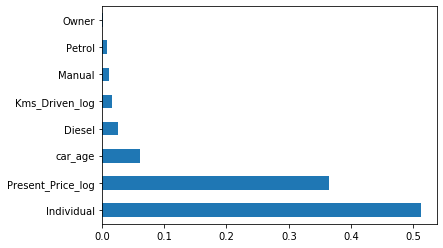

In [69]:
#### plot graph of feature importances for better visualization ###
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

#### check multicollinearity ###

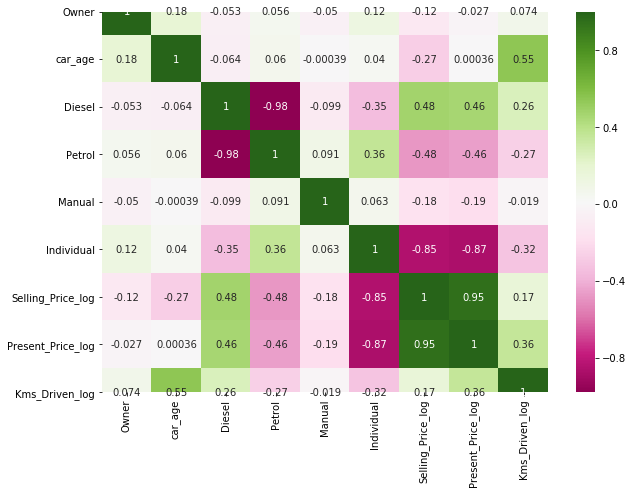

In [70]:
%matplotlib inline
# plot in heatmap
#### check Multicollinearity ###
corrmat = final_dataset.corr()
topCorrFeatures = corrmat.index
plt.figure(figsize = (10,7))
#plot heatmap
g = sns.heatmap(final_dataset[topCorrFeatures].corr(), annot=True, cmap="PiYG")


### Recursive Feature Elimination###

In [71]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm= LinearRegression()
lm.fit(X_train, y_train)


rfe= RFE(lm,10)
rfe = rfe.fit(X_train, y_train)

In [72]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Owner', True, 1),
 ('car_age', True, 1),
 ('Diesel', True, 1),
 ('Petrol', True, 1),
 ('Manual', True, 1),
 ('Individual', True, 1),
 ('Present_Price_log', True, 1),
 ('Kms_Driven_log', True, 1)]

In [73]:
col = X_train.columns[rfe.support_]
col

Index(['Owner', 'car_age', 'Diesel', 'Petrol', 'Manual', 'Individual',
       'Present_Price_log', 'Kms_Driven_log'],
      dtype='object')

In [74]:
X_train_rfe = X_train[col]

In [75]:
import statsmodels.api as sm
X_train_rfe= sm.add_constant(X_train_rfe)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [76]:
model = sm.OLS(y_train,X_train_rfe).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Selling_Price_log   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1272.
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          1.18e-167
Time:                        03:28:16   Log-Likelihood:                 116.18
No. Observations:                 210   AIC:                            -214.4
Df Residuals:                     201   BIC:                            -184.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4416      0.150      2.950      0.004       0.146       0.737
Owner                -0.1318      0.055     -2.385      0.018      -0.241      -0.023
car_age              -0.0791      0.004    -19.307      0.000      -0.087      -0.071
Diesel                0.2201      0.145      1.520      0.130      -0.066       0.506
Petrol                0.1063      0.143      0.742      0.459      -0.176       0.389
Manual                0.0102      0.029      0.351      0.726      -0.047       0.067
Individual           -0.1387      0.044     -3.164      0.002      -0.225      -0.052
Present_Price_log     0.8902      0.023     39.212      0.000       0.845       0.935
Kms_Driven_log       -0.0541      0.013     -4.175      0.000      -0.080      -0.029
==============================================================================
Omnibus:                        1.378   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                1.227
Skew:                          -0.187   Prob(JB):                        0.541
Kurtosis:                       3.023   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
 #### Dropping the "Petrol" variable which has p-value>0.05 resulting in insigificant...
X_train1= X_train_rfe.drop('Petrol',axis=1)

In [78]:
X_train2= sm.add_constant(X_train1)
model1= sm.OLS(y_train,X_train2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Selling_Price_log   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1457.
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          3.91e-169
Time:                        03:28:16   Log-Likelihood:                 115.89
No. Observations:                 210   AIC:                            -215.8
Df Residuals:                     202   BIC:                            -189.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5480      0.042     12.904      0.000       0.464       0.632
Owner                -0.1311      0.055     -2.375      0.018      -0.240      -0.022
car_age              -0.0792      0.004    -19.371      0.000      -0.087      -0.071
Diesel                0.1148      0.029      3.972      0.000       0.058       0.172
Manual                0.0095      0.029      0.330      0.742      -0.047       0.066
Individual           -0.1376      0.044     -3.144      0.002      -0.224      -0.051
Present_Price_log     0.8902      0.023     39.257      0.000       0.845       0.935
Kms_Driven_log       -0.0542      0.013     -4.188      0.000      -0.080      -0.029
==============================================================================
Omnibus:                        1.167   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                1.048
Skew:                          -0.173   Prob(JB):                        0.592
Kurtosis:                       3.005   Cond. No.                         42.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
 #### Dropping the "Owner" variable which has p-value>0.05 resulting in insigificant...
X_train3= X_train2.drop('Owner',axis=1)

In [80]:
X_train4= sm.add_constant(X_train3)
model2= sm.OLS(y_train,X_train4).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Selling_Price_log   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1661.
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          1.49e-169
Time:                        03:28:16   Log-Likelihood:                 113.00
No. Observations:                 210   AIC:                            -212.0
Df Residuals:                     203   BIC:                            -188.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5520      0.043     12.861      0.000       0.467       0.637
car_age              -0.0798      0.004    -19.336      0.000      -0.088      -0.072
Diesel                0.1181      0.029      4.045      0.000       0.061       0.176
Manual                0.0048      0.029      0.166      0.868      -0.053       0.062
Individual           -0.1404      0.044     -3.173      0.002      -0.228      -0.053
Present_Price_log     0.8898      0.023     38.800      0.000       0.845       0.935
Kms_Driven_log       -0.0531      0.013     -4.057      0.000      -0.079      -0.027
==============================================================================
Omnibus:                        3.907   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                3.648
Skew:                          -0.233   Prob(JB):                        0.161
Kurtosis:                       3.448   Cond. No.                         42.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#### Dropping the Individual independent colmn due to multicollinearity ###
X_train5= X_train4.drop('Individual',axis=1)

In [82]:
X_train6= sm.add_constant(X_train5)
model3= sm.OLS(y_train,X_train6).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Selling_Price_log   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1907.
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          4.39e-169
Time:                        03:28:17   Log-Likelihood:                 107.92
No. Observations:                 210   AIC:                            -203.8
Df Residuals:                     204   BIC:                            -183.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5025      0.041     12.296      0.000       0.422       0.583
car_age              -0.0815      0.004    -19.492      0.000      -0.090      -0.073
Diesel                0.1019      0.029      3.467      0.001       0.044       0.160
Manual                0.0220      0.029      0.752      0.453      -0.036       0.080
Present_Price_log     0.9519      0.012     77.942      0.000       0.928       0.976
Kms_Driven_log       -0.0510      0.013     -3.815      0.000      -0.077      -0.025
==============================================================================
Omnibus:                        5.095   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                5.044
Skew:                          -0.268   Prob(JB):                       0.0803
Kurtosis:                       3.538   Cond. No.                         34.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
X_train_new= X_train6.drop('const',axis=1)

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Manual,4.11
0,car_age,4.10
1,Diesel,1.55
3,Present_Price_log,1.42
4,Kms_Driven_log,1.36


In [85]:
#####We have VIF < 5 and hence there is no Multicollinearity occurrence in our model..........

#### LinearRegression ###

In [86]:
lm= LinearRegression()
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
#Dividing the test set into features and target.

y_test = df_test.pop('Selling_Price_log')
X_test = df_test

In [88]:
X_test_pred= X_test[X_train_new.columns]

X_test_pred= sm.add_constant(X_test_pred)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [89]:
y_pred= model3.predict(X_test_pred)

In [90]:
y_pred

199   -2.090488
201    0.138513
111   -0.536521
125   -1.066110
46     0.024056
         ...   
230    0.645429
29     0.884565
136   -0.920969
132   -0.759327
3     -0.137590
Length: 91, dtype: float64

Text(0, 0.5, 'y_pred')

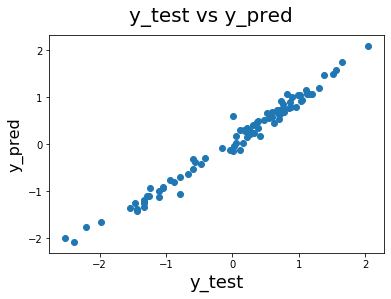

In [91]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 


In [92]:
df = pd.DataFrame({'Actual':y_test,"Predicted":y_pred})
df.head()

,Actual,Predicted
199,-2.378804,-2.090488
201,0.219079,0.138513
111,-0.599045,-0.536521
125,-0.792077,-1.066110
46,0.058355,0.024056


In [93]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [94]:
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
    # Plot for prediction vs originals
    test_index=y_test_.reset_index()["Selling_Price_log"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

r_2 score : 0.9811275070559747 

CV scores: [0.97728463 0.97292468 0.97929861 0.96797403 0.98478517] 

CV scores mean: 0.9764534234674729


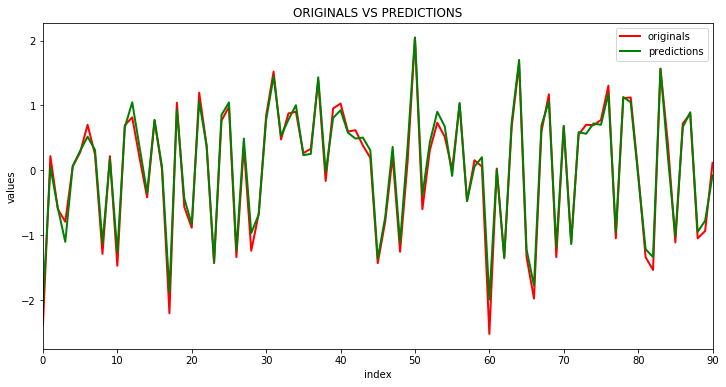

In [95]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,X_train,y_train,X_test,y_test)

In [96]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 0.11789948547186391
MSE: 0.024679515766965407
RMSE: 0.15709715391109225


 ### Decision Tree Regressor ###

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') 

r_2 score : 0.9384517991593436 

CV scores: [0.93976289 0.91495076 0.96763119 0.87200681 0.9656876 ] 

CV scores mean: 0.9320078524840989


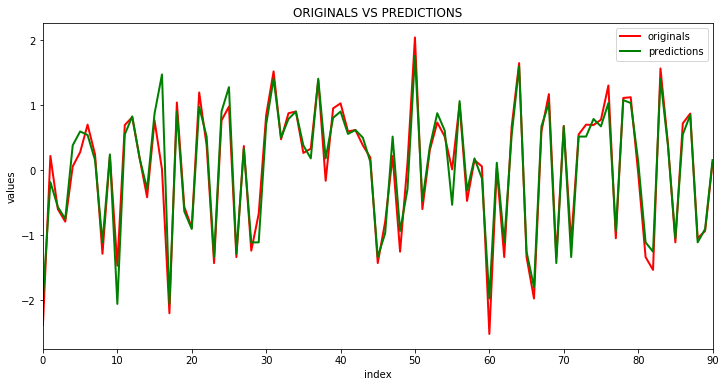

In [97]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,X_train,y_train,X_test,y_test)

### 5. Random Forest Regressor ###

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False) 

r_2 score : 0.9624636705703096 

CV scores: [0.94899401 0.95549053 0.98252898 0.92616749 0.97099426] 

CV scores mean: 0.9568350544892429


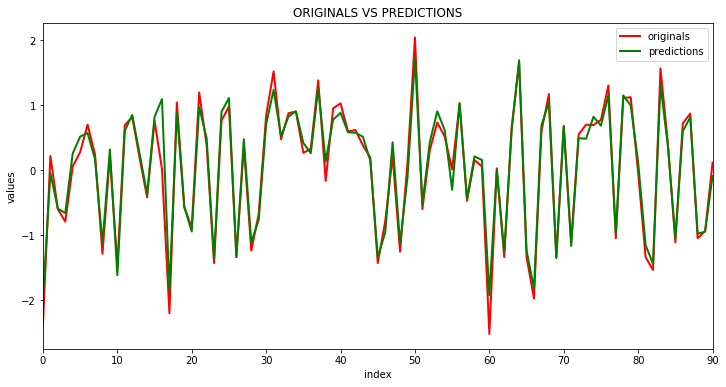

In [98]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model(rf,X_train,y_train,X_test,y_test)

In [99]:
Model = ["LinearRegression","DecisionTreeRegressor","RandomForestRegressor"]
results=pd.DataFrame({'Model': Model,'R Squared': r_2,'CV score mean': CV})
results

,Model,R Squared,CV score mean
0,LinearRegression,0.981128,0.976453
1,DecisionTreeRegressor,0.938452,0.932008
2,RandomForestRegressor,0.962464,0.956835
